# Quiz2/HW3 Hackathon

Team name: HONEYBADGERRS

Member names: Ryan Richardson, Jarret Guillow, Grace Gupta

Use this Jupyter Notebook as a template to get started. Before you start, here are a few hints that might help you

### Iterate your solution based on a simple first submission

For the quiz, try to use the numerical variables first. Fit a regression model on the numerical variables first and create a submission quickly. You can then try various other things and iterate your code based on the simple solution. Use Google to find code to solve the problems you encounter—e.g., how to select only the categorical variables in the DataFrame, how to impute missing data, etc.

### NAs (missing values) in both training set and test set

In the dataset you are working with in this competition, you will find that both the training set and test set have NAs (missing values). If the test set has missing values, your model will not be able to predict on the entire set. How do you deal with it? (Hint: one idea is to concatenate the training set and test set, fill in NAs with the means/median/mode or whatever you choose, then split them up again).

### Categorical variables

We have not discussed how to deal with categorical variables. They do not fit that easily into regression models. But how do we fully utilize them nontheless? (Hint: convert them into dummy variables, typically using one-hot encoding. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

### Model Evaluation

Your model will be evaluated using its Root Mean Squared Error (MSE) on the test set. (As usual, you do not have the labels on the test set, of course; so you cannot directly measure the RMSE on it.) You can calculate the MSE on a dataset using scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html. Then take the squared root of the MSE to get the RMSE.

In [3]:
#### Your code start here! Good luck have fun!

In [52]:
import pandas as pd
import numpy as np
train = pd.read_csv('/Users/gracegupta/Desktop/housing_data/train.csv')

In [53]:
train.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,20,RL,NaN,9248,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,173000
1,1,70,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,157000
2,2,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
3,3,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,161500
4,4,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,9,2008,WD,Normal,138000


In [54]:
train.shape

(2001, 81)

In [55]:
def preprocessing_pipeline(train):
    ## Your code goes here
    
    #get rid of NAs
    train = train.fillna(train.median())

    #get rid of outliers
    for X in train:
        mu = np.mean(train[X])
        std = np.std(train[X])
        normalized_data = (train[X]-mu)/std
        indexes = normalized_data < 3
        processed_train = train.loc[indexes, :]
    
    return processed_train

In [56]:
train_numeric = train._get_numeric_data()

In [57]:
categorical_cols = [] #contains labels for all categorical columns
for col in train.columns:
    if col not in train_numeric.columns:
        categorical_cols.append(col)

In [58]:
train_categorical = train[categorical_cols]

In [59]:
train_categorical.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RM,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
2,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,...,Attchd,Fin,TA,TA,Y,NaN,GdPrv,NaN,COD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,...,Detchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal


In [60]:
np.sum(train_categorical.isnull())

MS Zoning            0
Street               0
Alley             1872
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        16
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           53
Bsmt Cond           53
Bsmt Exposure       56
BsmtFin Type 1      53
BsmtFin Type 2      54
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu       936
Garage Type        104
Garage Finish      106
Garage Qual        106
Garage Cond        106
Paved Drive          0
Pool QC           1989
Fence             1633
Misc Feature      1929
Sale Type            0
Sale Condition       0
dtype: int6

In [61]:
train_categorical.shape

(2001, 43)

In [62]:
train_cat_nonulls = train_categorical.dropna(axis=1)

In [63]:
train_cat_nonulls.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Gd,Y,Gd,Typ,Y,WD,Normal
1,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,TA,BrkTil,GasA,Ex,Y,Gd,Typ,N,WD,Normal
2,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,...,Gd,CBlock,GasA,TA,Y,TA,Typ,Y,COD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,...,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal


In [64]:
train_cat_nonulls.dtypes

MS Zoning         object
Street            object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Exter Qual        object
Exter Cond        object
Foundation        object
Heating           object
Heating QC        object
Central Air       object
Kitchen Qual      object
Functional        object
Paved Drive       object
Sale Type         object
Sale Condition    object
dtype: object

Convert strings to dummy variables for heatmap.

In [65]:
train_cat_nonulls_dummys = pd.get_dummies(train_cat_nonulls)

In [66]:
train_cat_nonulls_dummys.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [67]:
train_cat_nonulls_dummys.shape

(2001, 188)

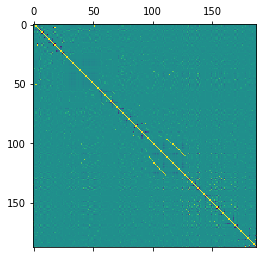

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(train_cat_nonulls_dummys.corr())
plt.show()

In [69]:
x = train_cat_nonulls_dummys.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.         -0.00166247 -0.00482432 ... -0.00266379 -0.04951088
  -0.0064794 ]
 [-0.00166247  1.         -0.01604061 ... -0.00885697 -0.05651252
  -0.02154368]
 [-0.00482432 -0.01604061  1.         ... -0.02570198 -0.09643195
   0.182327  ]
 ...
 [-0.00266379 -0.00885697 -0.02570198 ...  1.         -0.26377348
  -0.03451958]
 [-0.04951088 -0.05651252 -0.09643195 ... -0.26377348  1.
  -0.64160193]
 [-0.0064794  -0.02154368  0.182327   ... -0.03451958 -0.64160193
   1.        ]]


In [70]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [71]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [72]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_cat_nonulls_dummys, 20))

Top Absolute Correlations
MS Zoning_A (agr)     Heating QC_Po             1.000000
MS Zoning_I (all)     Utilities_AllPub          1.000000
Central Air_N         Central Air_Y             1.000000
MS Zoning_I (all)     Utilities_NoSewr          1.000000
Street_Grvl           Street_Pave               1.000000
Exterior 1st_PreCast  Exterior 2nd_PreCast      1.000000
Utilities_AllPub      Utilities_NoSewr          1.000000
Sale Type_New         Sale Condition_Partial    0.996499
Exterior 1st_CemntBd  Exterior 2nd_CmentBd      0.981893
Exterior 1st_VinylSd  Exterior 2nd_VinylSd      0.980484
Exterior 1st_MetalSd  Exterior 2nd_MetalSd      0.975626
Land Slope_Gtl        Land Slope_Mod            0.948148
Roof Style_Gable      Roof Style_Hip            0.942221
Lot Shape_IR1         Lot Shape_Reg             0.934165
Exter Qual_Gd         Exter Qual_TA             0.894601
Exterior 1st_HdBoard  Exterior 2nd_HdBoard      0.891712
Exterior 1st_Wd Sdng  Exterior 2nd_Wd Sdng      0.874939
Exter

# Fit model to all features (except ones with nulls)

In [188]:
X_train_cat = train_cat_nonulls_dummys #fix the fact that X_train_cat and y_train_cat have diff # rows

In [189]:
X_train_cat.shape

(2001, 188)

In [190]:
X_train_cat.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [183]:
y_train_cat = train_numeric['SalePrice']

In [184]:
y_train_cat.shape

(1969,)

In [195]:
X_train_cat = X_train_cat.reindex(y_train_cat.index);

In [196]:
X_train_cat.shape

(1969, 188)

In [197]:
model_cat = sm.OLS(y_train_cat, sm.add_constant(X_train_cat)).fit()

In [198]:
model_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     45.45
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:25:16   Log-Likelihood:                -23167.
No. Observations:                1969   AIC:                         4.665e+04
Df Residuals:                    1810   BIC:                         4.754e+04
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.664e+16   3.01e+16     -0.885      0.376   -8.57e+16    3.24e+16
MS Zoning_A (agr)      -1.254e+15   1.42e+15     -0.885      0.376   -4.03e+15    1.52e+15
MS Zoning_C (all)      -7.486e+15   8.46e+15     -0.885      0.376   -2.41e+16     9.1e+15
MS Zoning_FV           -7.486e+15   8.46e+15     -0.885      0.376   -2.41e+16     9.1e+15
MS Zoning_I (all)       -3.73e+15   4.21e+15     -0.885      0.376    -1.2e+16    4.54e+15
MS Zoning_RH           -7.486e+15   8.46e+15     -0.885      0.376   -2.41e+16     9.1e+15
MS Zoning_RL           -7.486e+15   8.46e+15     -0.885      0.376   -2.41e+16     9.1e+15
MS Zoning_RM           -7.486e+15   8.46e+15     -0.885      0.376   -2.41e+16     9.1e+15
Street_Grvl            -2.011e+15   2.27e+15     -0.885      0.376   -6.47e+15    2.44e+15
Street_Pave            -2.011e+15   2.27e+15     -0.885      0.376   -6.47e+15    2.44e+15
Lot Shape_IR1          -1.475e+16   1.67e+16     -0.885      0.376   -4.74e+16    1.79e+16
Lot Shape_IR2          -1.475e+16   1.67e+16     -0.885      0.376   -4.74e+16    1.79e+16
Lot Shape_IR3          -1.475e+16   1.67e+16     -0.885      0.376   -4.74e+16    1.79e+16
Lot Shape_Reg          -1.475e+16   1.67e+16     -0.885      0.376   -4.74e+16    1.79e+16
Land Contour_Bnk       -4.463e+15   5.04e+15     -0.885      0.376   -1.44e+16    5.43e+15
Land Contour_HLS       -4.463e+15   5.04e+15     -0.885      0.376   -1.44e+16    5.43e+15
Land Contour_Low       -4.463e+15   5.04e+15     -0.885      0.376   -1.44e+16    5.43e+15
Land Contour_Lvl       -4.463e+15   5.04e+15     -0.885      0.376   -1.44e+16    5.43e+15
Utilities_AllPub       -1.372e+14   1.55e+14     -0.885      0.376   -4.41e+14    1.67e+14
Utilities_NoSewr       -3.893e+15    4.4e+15     -0.885      0.376   -1.25e+16    4.73e+15
Lot Config_Corner      -9.842e+15   1.11e+16     -0.885      0.376   -3.16e+16     1.2e+16
Lot Config_CulDSac     -9.842e+15   1.11e+16     -0.885      0.376   -3.16e+16     1.2e+16
Lot Config_FR2         -9.842e+15   1.11e+16     -0.885      0.376   -3.16e+16     1.2e+16
Lot Config_FR3         -9.842e+15   1.11e+16     -0.885      0.376   -3.16e+16     1.2e+16
Lot Config_Inside      -9.842e+15   1.11e+16     -0.885      0.376   -3.16e+16     1.2e+16
Land Slope_Gtl          -4.25e+15    4.8e+15     -0.885      0.376   -1.37e+16    5.17e+15
Land Slope_Mod          -4.25e+15    4.8e+15     -0.885      0.376   -1.37e+16    5.17e+15
Land Slope_Sev          -4.25e+15    4.8e+15     -0.885      0.376   -1.37e+16    5.17e+15
Neighborhood_Blmngtn    6.332e+14   7.15e+14      0.885      0.376    -7.7e+14    2.04e+15
Neighborhood_Blueste    6.332e+14   7.15e+14      0.885      0.376    -7.7e+14    2.04e+15
Neighborhood_BrDale     6.332e+14   7.15e+14      0.885      0.376    -7.7e+14  

# Numeric data

In [73]:
train_numeric.shape

(2001, 38)

In [74]:
np.sum(train_numeric.isnull())

Id                   0
MS SubClass          0
Lot Frontage       332
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        16
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      106
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [75]:
train_numeric = preprocessing_pipeline(train_numeric)

In [76]:
np.sum(train_numeric.isnull()); #check all nulls filled

In [77]:
train_numeric = train_numeric.drop(columns=['Id'])

In [78]:
train_numeric.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,69.0,9248,6,6,1992,1992,106.0,560.0,0.0,...,120,26,0,0,0,0,0,7,2009,173000
1,70,60.0,7200,7,7,1920,1950,0.0,0.0,0.0,...,36,0,221,0,0,0,0,10,2006,157000
2,160,24.0,1950,6,6,1980,1980,0.0,81.0,612.0,...,161,0,0,0,0,0,0,7,2008,151000
3,20,69.0,9790,6,5,1967,1967,0.0,251.0,630.0,...,0,0,0,0,197,0,0,9,2009,161500
4,50,60.0,8064,6,6,1948,1950,0.0,315.0,0.0,...,108,0,0,0,0,0,0,9,2008,138000


In [79]:
train_numeric.shape

(1969, 37)

# Calculate VIFs for numeric data

In [80]:
def calculate_vif(r_squared):
    ## Your code goes here
    vif = 1/(1-r_squared)
    return vif

In [81]:
import statsmodels.api as sm

def generate_vif_dataframe(processed_train):
    ## Your code goes here
    data = []
    for X in processed_train:
        X_list = []
        X_list.append(X)
        i = processed_train.columns.get_loc(X)
        reg_list = [] #contains all other variables for regression against X
        for j in range(len(processed_train.columns)):
            if j != i :
                reg_list.append(processed_train.columns[j])
        model = sm.OLS(processed_train[X], sm.add_constant(processed_train[reg_list])).fit()
        rsq = model.rsquared
        vif = calculate_vif(rsq)
        X_list.append(vif)
        data.append(X_list)
        
    vif_dataframe = pd.DataFrame(data, columns = ['Variable name','VIF'])
                                
    return vif_dataframe

In [83]:
numeric_features = train_numeric.loc[:, train_numeric.columns != 'SalePrice']

In [86]:
vif_dataframe = generate_vif_dataframe(numeric_features)
vif_dataframe.sort_values('VIF',ascending=False)

/Users/gracegupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,Variable name,VIF
14,Low Qual Fin SF,inf
15,Gr Liv Area,inf
12,1st Flr SF,inf
13,2nd Flr SF,inf
8,BsmtFin SF 1,1.440326e+04
10,Bsmt Unf SF,1.412280e+04
11,Total Bsmt SF,1.341112e+04
9,BsmtFin SF 2,2.005389e+03
25,Garage Cars,5.729113e+00
26,Garage Area,5.452137e+00


# Building model based on VIFs

In [165]:
columns_to_exclude = ['BsmtFin SF 1','Garage Cars','Year Built','Total Bsmt SF','TotRms AbvGrd','Garage Yr Blt','Full Bath','Low Qual Fin SF','Gr Liv Area','1st Flr SF']
subset = numeric_features.drop(columns_to_exclude, axis=1)
vifs = generate_vif_dataframe(subset)
vifs.sort_values('VIF',ascending=False)

,Variable name,VIF
9,2nd Flr SF,2.733672
3,Overall Qual,2.416626
12,Half Bath,1.771050
8,Bsmt Unf SF,1.759917
13,Bedroom AbvGr,1.758274
5,Year Remod/Add,1.679238
16,Garage Area,1.678106
10,Bsmt Full Bath,1.626982
0,MS SubClass,1.621670
1,Lot Frontage,1.570370


In [166]:
X_train_trimmed = subset

In [167]:
y_train_trimmed = train_numeric["SalePrice"]

In [168]:
import statsmodels.api as sm

In [169]:
model_trim = sm.OLS(y_train_trimmed, sm.add_constant(X_train_trimmed)).fit()

In [170]:
model_trim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     289.2
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:10:14   Log-Likelihood:                -23186.
No. Observations:                1969   AIC:                         4.643e+04
Df Residuals:                    1942   BIC:                         4.658e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.456e+06   1.11e+06      2.207      0.027    2.73e+05    4.64e+06
MS SubClass     -147.5313     21.709     -6.796      0.000    -190.107    -104.955
Lot Frontage     124.3701     43.163      2.881      0.004      39.719     209.021
Lot Area           0.4941      0.110      4.487      0.000       0.278       0.710
Overall Qual    2.296e+04    807.371     28.441      0.000    2.14e+04    2.45e+04
Overall Cond    -656.2998    694.728     -0.945      0.345   -2018.792     706.192
Year Remod/Add   520.8595     44.298     11.758      0.000     433.983     607.736
Mas Vnr Area      41.0098      4.916      8.342      0.000      31.368      50.651
BsmtFin SF 2       0.9976      4.508      0.221      0.825      -7.843       9.838
Bsmt Unf SF        7.6315      2.135      3.575      0.000       3.445      11.818
2nd Flr SF        20.0170      2.774      7.217      0.000      14.577      25.457
Bsmt Full Bath  1.886e+04   1728.533     10.912      0.000    1.55e+04    2.23e+04
Bsmt Half Bath  5274.6531   3178.676      1.659      0.097    -959.322    1.15e+04
Half Bath       -928.3897   1885.884     -0.492      0.623   -4626.960    2770.180
Bedroom AbvGr   3322.0701   1126.865      2.948      0.003    1112.078    5532.062
Kitchen AbvGr    969.2020   3992.021      0.243      0.808   -6859.895    8798.300
Fireplaces      1.332e+04   1308.472     10.183      0.000    1.08e+04    1.59e+04
Garage Area       51.5760      4.342     11.879      0.000      43.061      60.091
Wood Deck SF      35.7284      6.195      5.767      0.000      23.578      47.879
Open Porch SF     18.0314     11.424      1.578      0.115      -4.372      40.435
Enclosed Porch     9.2229     12.103      0.762      0.446     -14.513      32.959
3Ssn Porch        35.2833     26.490      1.332      0.183     -16.669      87.236
Screen Porch      50.5479     13.412      3.769      0.000      24.244      76.852
Pool Area        -51.5873     18.490     -2.790      0.005     -87.850     -15.325
Misc Val          -5.9222      1.191     -4.973      0.000      -8.258      -3.587
Mo Sold         -180.7576    267.301     -0.676      0.499    -704.984     343.469
Yr Sold        -1754.3960    554.794     -3.162      0.002   -2842.451    -666.341
==============================================================================
Omnibus:                      316.508   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5458.050
Skew:                           0.088   Prob(JB):                         0.00
Kurtosis:                      11.155   Cond. No.                     1.99e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditio

# Building model based on all numeric features

In [18]:
X_train = train_numeric.loc[:, train_numeric.columns != 'SalePrice']

In [19]:
X_train.shape

(1969, 36)

In [20]:
y_train = train_numeric["SalePrice"]

In [21]:
y_train.shape

(1969,)

In [22]:
import statsmodels.api as sm

In [23]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     280.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:17:57   Log-Likelihood:                -22991.
No. Observations:                1969   AIC:                         4.605e+04
Df Residuals:                    1934   BIC:                         4.625e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.298e+06   1.02e+06      1.276      0.202   -6.98e+05    3.29e+06
MS SubClass      -149.9608     19.862     -7.550      0.000    -188.914    -111.007
Lot Frontage       -0.6232     40.055     -0.016      0.988     -79.178      77.931
Lot Area            0.2861      0.102      2.814      0.005       0.087       0.485
Overall Qual     1.614e+04    814.976     19.802      0.000    1.45e+04    1.77e+04
Overall Cond     4412.1330    732.802      6.021      0.000    2974.968    5849.298
Year Built        318.8565     48.137      6.624      0.000     224.450     413.263
Year Remod/Add    190.4781     48.885      3.896      0.000      94.605     286.351
Mas Vnr Area       21.4607      4.618      4.647      0.000      12.403      30.518
BsmtFin SF 1        6.9037      1.748      3.949      0.000       3.475      10.332
BsmtFin SF 2       -1.9893      3.097     -0.642      0.521      -8.063       4.085
Bsmt Unf SF         1.4377      1.645      0.874      0.382      -1.788       4.663
Total Bsmt SF       6.3521      2.313      2.746      0.006       1.816      10.888
1st Flr SF         19.7480      4.259      4.637      0.000      11.395      28.101
2nd Flr SF         20.7452      3.991      5.198      0.000      12.918      28.573
Low Qual Fin SF   -14.7807     10.305     -1.434      0.152     -34.990       5.429
Gr Liv Area        25.7125      3.994      6.438      0.000      17.880      33.545
Bsmt Full Bath   1.016e+04   1784.934      5.692      0.000    6660.015    1.37e+04
Bsmt Half Bath   1849.5525   2922.607      0.633      0.527   -3882.239    7581.344
Full Bath        1680.7279   1964.134      0.856      0.392   -2171.314    5532.770
Half Bath       -2399.6225   1901.782     -1.262      0.207   -6129.380    1330.135
Bedroom AbvGr   -3820.6531   1210.716     -3.156      0.002   -6195.099   -1446.207
Kitchen AbvGr    -1.31e+04   3949.747     -3.316      0.001   -2.08e+04   -5350.036
TotRms AbvGrd    1759.6808    862.069      2.041      0.041      68.999    3450.363
Fireplaces       7416.6727   1255.779      5.906      0.000    4953.849    9879.496
Garage Yr Blt     151.0529     46.941      3.218      0.001      58.992     243.114
Garage Cars      7384.7234   2049.998      3.602      0.000    3364.286    1.14e+04
Garage Area         8.0843      7.107      1.138      0.255      -5.854      22.023
Wood Deck SF       20.4465      5.680      3.599      0.000       9.306      31.587
Open Porch SF      -8.6901     10.564     -0.823      0.411     -29.409      12.029
Enclosed Porch     34.1295     11.602      2.942      0.003      11.377      56.882
3Ssn Porch         23.9399     24.096      0.994      0.321     -23.316      71.196
Screen Porch       45.4625     12.253      3.710      0.000      21.431      69.494
Pool Area         -73.8228     16.935     -4.359      0.000

# Predict on test data

In [24]:
#Read the test set in
test = pd.read_csv('/Users/gracegupta/Desktop/housing_data/test.csv')

In [25]:
test_numeric = test._get_numeric_data()

In [26]:
test_numeric.shape

(929, 37)

In [27]:
np.sum(test_numeric.isnull())

Id                   0
MS SubClass          0
Lot Frontage       158
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         7
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       53
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [28]:
test_numeric = preprocessing_pipeline(test_numeric)

In [29]:
np.sum(train_numeric.isnull())

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [30]:
test_numeric.shape

(929, 37)

In [31]:
X_test = test_numeric.loc[:, test_numeric.columns != 'SalePrice']

In [32]:
X_test = X_test.drop(columns=['Id'])

In [33]:
y_pred = model.predict(sm.add_constant(X_test))

In [34]:
sample_submission = pd.read_csv('/Users/gracegupta/Desktop/housing_data/sample_submission (1).csv')
sample_submission.loc[:, 'SalePrice'] = y_pred
sample_submission.to_csv('quiz_attempt5.csv', header=True, index=False)
sample_submission.head()

,Id,SalePrice
0,0,115951.219912
1,1,208791.157736
2,2,106891.842539
3,3,179980.433597
4,4,190214.372863
